In [1]:
!pip install scikit-image opencv-python matplotlib

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     --------- --------------------------- 41.0/167.0 kB 991.0 kB/s eta 0:00:01
     --------------------------- ---------- 122.9/167.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.8 MB 1.6 MB/s eta 0:00:08
   ---------------------------------------- 0.1/12.8 MB 1.4 MB/s eta 0:00:09
    --------------------------------------- 0.2/12.8 MB 1.3 MB/s eta 0:00:10
    --------------------------------------- 0.2/12.8 MB 1.3 MB/s eta 0:00:10
    --------------------------------------- 0.3/12.8 MB 1.4 MB/s eta 0:00:10



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


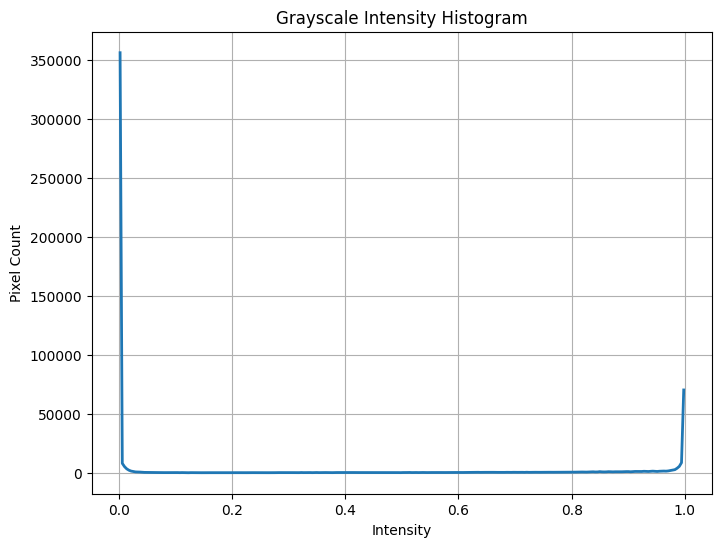

Texture Features: 
 Contrast: 253.35966152862358
 Energy: 0.51369169739464
 Homogeneity: 0.6681445735911933
 Correlation: 0.9884404834229932


In [1]:
import numpy as np
import cv2
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, exposure
import matplotlib.pyplot as plt

# Load the MRI image (Ensure it's grayscale or convert to grayscale)
def load_image(image_path):
    img = io.imread(image_path)
    if len(img.shape) == 3:  # Check if it's a color image
        img = color.rgb2gray(img)
    return img

# Histogram of grayscale intensities
def intensity_histogram(image):
    hist, bins = exposure.histogram(image)
    plt.figure(figsize=(8, 6))
    plt.plot(bins, hist, lw=2)
    plt.title('Grayscale Intensity Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
    plt.grid()
    plt.show()

# Texture features using GLCM
def texture_features(image, distances=[1], angles=[0]):
    # Quantize image to 256 gray levels (0-255)
    image = (image * 255).astype(np.uint8)
    
    # Compute GLCM (Gray Level Co-occurrence Matrix)
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    
    # Extract texture features (contrast, dissimilarity, homogeneity, energy, correlation)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    print(f"Texture Features: \n Contrast: {contrast}\n Energy: {energy}\n Homogeneity: {homogeneity}\n Correlation: {correlation}")
    
    return contrast, energy, homogeneity, correlation

# Main function to load image and extract features
if __name__ == "__main__":
    # Provide the path to your MRI image here
    image_path = 'C:/Users/desai/OneDrive/Desktop/M.Tech Projects/Dataset/yes/y10.jpg'
    
    # Load the grayscale MRI image
    image = load_image(image_path)
    
    # Display the grayscale intensity histogram
    intensity_histogram(image)
    
    # Extract and display GLCM texture features
    texture_features(image)
